In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as im
import cv2

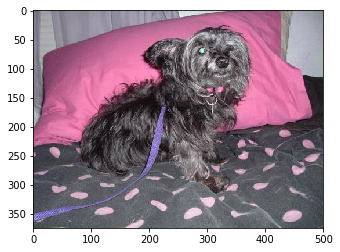

In [6]:
img=cv2.imread(r"C:\Users\etisalat\deep learning\Computer-Vision-with-Python\DATA\CATS_DOGS\train\DOG\0.jpg")
img2=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()
#cv2.imshow("img",img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


In [7]:
img2.shape

(375, 500, 3)

### choose our setting for the image augmentation, creating multiple versions from the origenal photo

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\etisalat\anacondanew\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\etisalat\anacondanew\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\etisalat\anacondanew\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\etisalat\anacondanew\Anaconda3\lib\site-packages\ten

In [3]:
image_gen=ImageDataGenerator(rotation_range=30,
                   width_shift_range=0.1,
                   height_shift_range=0.1,
                   rescale=1/255,
                   shear_range=0.2,
                   zoom_range=0.2,
                   horizontal_flip=True)

### let's try it

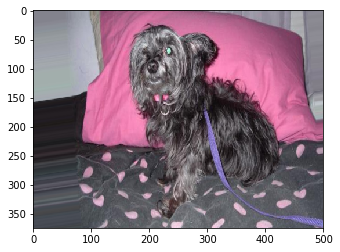

In [17]:
plt.imshow(image_gen.random_transform(img2))
plt.show()

In [18]:
image_shape=(150,150,3)

### Creating our model (CNN+ANN)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(120,activation="relu"))  #--> HL
model.add(Dense(1,activation="sigmoid"))  # output layer

model.compile(optimizer="adam",loss="binary_crossentropy")

early_stop=EarlyStopping(patience=2)

In [25]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9248)              0         
__________

### loading the training data

In [28]:
xtrain=image_gen.flow_from_directory(r"C:\Users\etisalat\deep learning\Computer-Vision-with-Python\DATA\CATS_DOGS\train",
                              target_size=(150,150),class_mode='binary')

Found 18743 images belonging to 2 classes.


### loading the testing data

In [29]:
xtest=image_gen.flow_from_directory(r"C:\Users\etisalat\deep learning\Computer-Vision-with-Python\DATA\CATS_DOGS\test",
                              target_size=(150,150),class_mode='binary')

Found 6251 images belonging to 2 classes.


In [30]:
xtrain.class_indices

{'CAT': 0, 'DOG': 1}

### Feed the training data to our model, we will stop it becouse it will take alot of time (almost 50 hour)

In [31]:
model.fit_generator(xtrain,epochs=100,callbacks=[early_stop])

Epoch 1/100
 41/586 [=>............................] - ETA: 24:18 - loss: 0.7047

KeyboardInterrupt: 

### loading the trained model with 100 epoch

In [4]:
import tensorflow

In [5]:
trained_model=tensorflow.keras.models.load_model(r"C:\Users\etisalat\Desktop\Etisalat Main Folder\Training Materials\Deep Learning\Final material\cat_dog_100epochs.h5",compile=False)

### loading new photo for prediction

In [9]:
from tensorflow.keras.preprocessing import image

In [16]:
img=image.load_img(r"C:\Users\etisalat\Desktop\file-20200803-24-50u91u.jpg",target_size=(150,150))

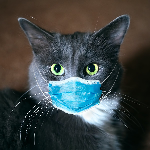

In [17]:
img

In [18]:
img_array=image.img_to_array(img)

In [19]:
img=img_array.reshape(1,150,150,3)

In [20]:
img

array([[[[51., 41., 31.],
         [51., 41., 31.],
         [51., 41., 31.],
         ...,
         [66., 53., 37.],
         [67., 53., 42.],
         [65., 51., 40.]],

        [[50., 40., 30.],
         [50., 40., 30.],
         [50., 40., 30.],
         ...,
         [68., 55., 39.],
         [67., 53., 42.],
         [65., 51., 40.]],

        [[49., 39., 29.],
         [49., 39., 29.],
         [49., 39., 27.],
         ...,
         [68., 55., 39.],
         [68., 54., 41.],
         [67., 53., 42.]],

        ...,

        [[ 9., 21., 21.],
         [ 7., 19., 19.],
         [ 8., 20., 20.],
         ...,
         [30., 29., 24.],
         [33., 30., 23.],
         [33., 30., 23.]],

        [[ 2., 13., 15.],
         [ 2., 13., 15.],
         [ 4., 16., 16.],
         ...,
         [32., 29., 22.],
         [34., 29., 23.],
         [35., 30., 24.]],

        [[ 3., 14., 16.],
         [ 0., 11., 13.],
         [ 0., 11., 11.],
         ...,
         [32., 29., 22.],
        

In [21]:
trained_model.predict_classes(img)

array([[0]])